# YOLO
YOLO: Real-Time Object Detection

In [5]:
from gluoncv import model_zoo, data, utils
from matplotlib import pyplot as plt

## I. Load a pretrained model

Let’s get an YOLOv3 model trained with on Pascal VOC dataset with Darknet53 as the base model. By specifying pretrained=True, it will automatically download the model from the model zoo if necessary. For more pretrained models, please refer to Model Zoo.

In [7]:
net = model_zoo.get_model('yolo3_darknet53_voc', pretrained=True)

## II. Pre-process an image

Next we download an image, and pre-process with preset data transforms. Here we specify that we resize the short edge of the image to 512 px. You can feed an arbitrarily sized image. Once constraint for YOLO is that input height and width can be divided by 32.

You can provide a list of image file names, such as [im_fname1, im_fname2, ...] to gluoncv.data.transforms.presets.yolo.load_test() if you want to load multiple image together.

This function returns two results. The first is a NDArray with shape (batch_size, RGB_channels, height, width). It can be fed into the model directly. The second one contains the images in numpy format to easy to be plotted. Since we only loaded a single image, the first dimension of x is 1.

In [8]:
im_fname = utils.download('https://raw.githubusercontent.com/zhreshold/' +
                          'mxnet-ssd/master/data/demo/dog.jpg',
                          path='dog.jpg')
x, img = data.transforms.presets.yolo.load_test(im_fname, short=512)
print('Shape of pre-processed image:', x.shape)

100%|███████████████████████████████████████| 160/160 [00:00<00:00, 1780.83KB/s]

Shape of pre-processed image: (1, 3, 512, 683)


## III. Inference and display

The forward function will return all detected bounding boxes, and the corresponding predicted class IDs and confidence scores. Their shapes are (batch_size, num_bboxes, 1), (batch_size, num_bboxes, 1), and (batch_size, num_bboxes, 4), respectively.

We can use gluoncv.utils.viz.plot_bbox() to visualize the results. We slice the results for the first image and feed them into plot_bbox:

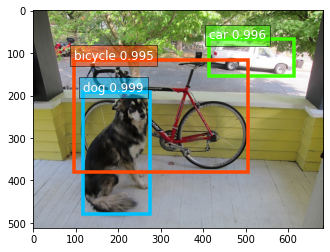

In [9]:
class_IDs, scores, bounding_boxs = net(x)

ax = utils.viz.plot_bbox(img, bounding_boxs[0], scores[0],
                         class_IDs[0], class_names=net.classes)
plt.show()

## IV. my data

In [17]:
import matplotlib.image as mpimg

x, img = data.transforms.presets.yolo.load_test('test1.jpg', short=512)
print('Shape of pre-processed image:', x.shape)

Shape of pre-processed image: (1, 3, 512, 910)


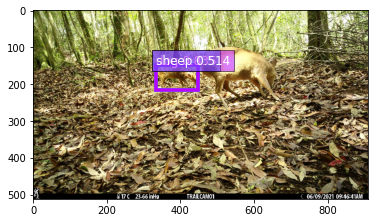

In [18]:
class_IDs, scores, bounding_boxs = net(x)

ax = utils.viz.plot_bbox(img, bounding_boxs[0], scores[0],
                         class_IDs[0], class_names=net.classes)
plt.show() #山羌

In [19]:
def catch(file_name):
    x, img = data.transforms.presets.yolo.load_test(file_name, short=512)
    print('Shape of pre-processed image:', x.shape)
    class_IDs, scores, bounding_boxs = net(x)

    ax = utils.viz.plot_bbox(img, bounding_boxs[0], scores[0],
                             class_IDs[0], class_names=net.classes)
    plt.show()

Shape of pre-processed image: (1, 3, 512, 910)


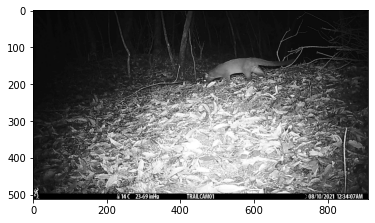

In [20]:
catch('test2.jpg')

Shape of pre-processed image: (1, 3, 512, 910)


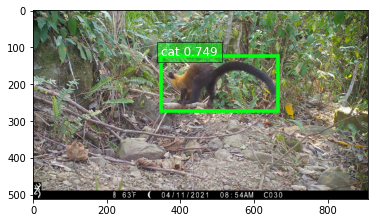

In [21]:
catch('test3.JPG')

Shape of pre-processed image: (1, 3, 512, 910)


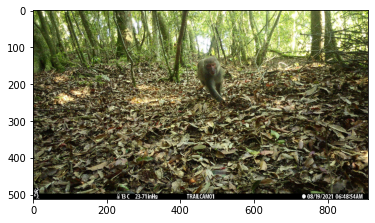

In [22]:
catch('test4.JPG')

Shape of pre-processed image: (1, 3, 512, 910)


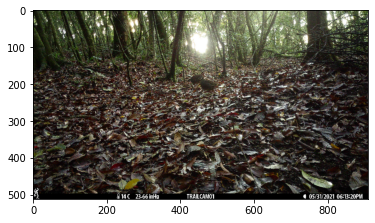

In [23]:
catch('test5.JPG')

Shape of pre-processed image: (1, 3, 512, 910)


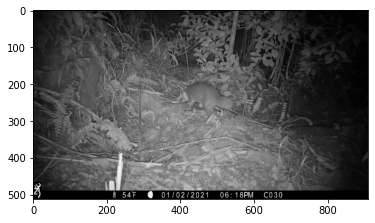

In [24]:
catch('test6.jpg')

Shape of pre-processed image: (1, 3, 512, 910)


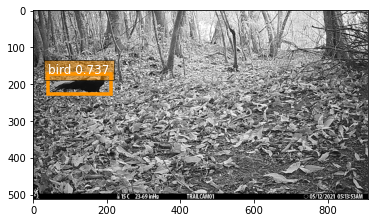

In [25]:
catch('test7.jpg') #藍腹鷴

Shape of pre-processed image: (1, 3, 512, 910)


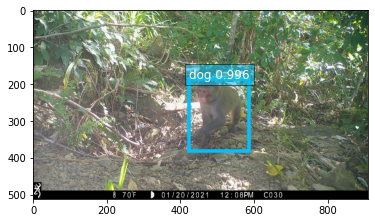

In [28]:
catch('test8.JPG') #猴子

Shape of pre-processed image: (1, 3, 512, 910)


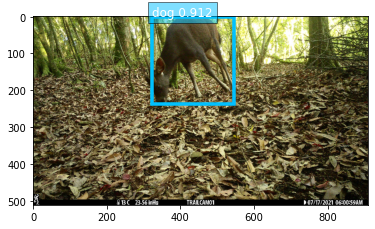

In [29]:
catch('test9.JPG') #水鹿

Shape of pre-processed image: (1, 3, 512, 910)


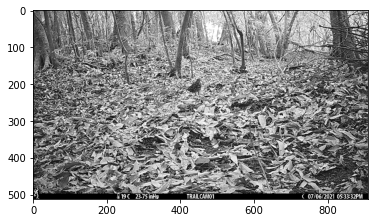

In [30]:
catch('test10.JPG') 

---

- 二分類問題-> VGG

(標注問題)
- 使用 labelImg 手動進行標註
- 使用 insightface 自動化標註
- 使用 YOLO 自動化標註-> 最後選擇的方法